In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import cartopy as cr
import cartopy.feature as cf
import cartopy.crs as ccrs

In [2]:
data_u = xr.open_dataset("./uwnd.jjas.nc"); data_v = xr.open_dataset("./vwnd.jjas.nc")


data_u = data_u.mean(dim='time'); data_v = data_v.mean(dim='time')
data_u = data_u.sel(level = 200) - data_u.sel(level = 850); data_v = data_v.sel(level = 200) - data_v.sel(level=850)
data_u = data_u['uwnd']; data_v = data_v['vwnd']

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


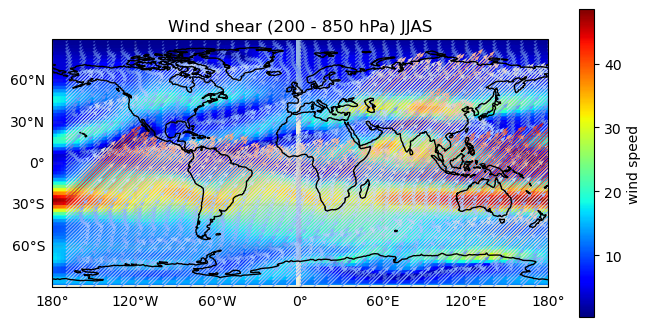

In [4]:
wind = np.sqrt(data_u**2 + data_v**2); direction = np.arctan2(data_v,data_u)

wind_u = wind*np.cos(direction); wind_v = wind*np.sin(direction)

lat = data_u.lat; lon = data_u.lon

vector = np.sqrt(wind_u**2 + wind_v**2)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax.add_feature(cf.LAND)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.OCEAN)

skip = (slice(None, None, 1), slice(None, None, 4))
lon_2d, lat_2d = np.meshgrid(lon, lat)
ax.quiver(lon_2d[skip], lat_2d[skip], vector[skip], vector[skip], vector[skip],transform=ccrs.PlateCarree(), cmap='coolwarm', scale=300)
mp = ax.imshow(vector, extent=(lon.min(),lon.max(),lat.min(),lat.max()), cmap='jet', origin='upper')

cbar = fig.colorbar(mp, shrink=0.8,label='wind speed')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.1, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
plt.title('Wind shear (200 - 850 hPa) JJAS')
plt.savefig("../summer monsoon/task8_plots/Wind shear (200 - 850 hPa) JJAS")